# Practice 2: Structural Model

## Objetives:
1. Test the hypothesized model
    1. H1 - Customer service quality(QS) positively influences Satisfaction (S)
    2. H2 - Financial quality (QF) positively influences Satisfaction (S)
    3. H3 - Technical quality (QT) positively influences Satisfaction (S)
    4. H4 - Satisfaction (S) positively influences Loyalty (L)
2. Report direct and indirect effects

## Data Preparation

In [1]:
import pandas as pd
import pyreadstat
from pandas.core.interchange.dataframe_protocol import DataFrame

raw_data_df, meta = pyreadstat.read_sav("../data/EXERCICIO_2025.sav")
raw_data_df.head()

,CASO,f1,f2,f3,f4,f5,f6,f7,P1.1_QA,P1.2_QA,...,P7,P14,ltv2,tempo,clsocial,SATIS,LEAL,ATEND,FIN,TEC
0,NaN,1.0,3.0,6.0,1.0,1.0,50.0,18.0,8.0,6.0,...,3.0,2.0,1373.0,61.0,5.0,6.50,6.2,7.2,9.333333,8.50
1,NaN,1.0,1.0,5.0,1.0,1.0,36.0,35.0,8.0,7.0,...,1.0,1.0,1002.0,47.0,5.0,5.50,4.4,6.8,6.666667,8.00
2,NaN,1.0,3.0,5.0,1.0,1.0,72.0,73.0,10.0,10.0,...,2.0,2.0,2097.0,83.0,5.0,7.50,8.0,9.6,10.000000,8.00
3,NaN,1.0,3.0,9.0,1.0,1.0,24.0,27.0,6.0,6.0,...,1.0,2.0,802.0,35.0,4.0,6.25,6.2,6.4,7.666667,6.50
4,NaN,1.0,4.0,9.0,1.0,1.0,72.0,24.0,2.0,5.0,...,2.0,1.0,4835.0,78.0,4.0,5.25,4.4,4.4,5.666667,5.75


In [2]:
columns_to_filter = [
    'P1.1_QA', 'P1.2_QA', 'P1.3_QA', 'P1.4_QA', 'P1.5_QA', 'P1.15_QA', 'P1.16_QA', 'P1.17_QA',
    'P1.6_QC', 'P1.7_QC', 'P1.8_QC', 'P1.9_QC',
    'P1.10_QT', 'P1.11_QT', 'P1.12_QT', 'P1.13_QT', 'P1.14_QT',
    'P3.1_S', 'P3.2_S', 'P3.3_S', 'P3.4_S',
    'P6.1_L', 'P6.2_L', 'P6.3_L', 'P6.4_L', 'P6.5_L', 'P6.6_L'
]

clean_df = raw_data_df[columns_to_filter].copy()

clean_df.rename(columns=lambda c: c.replace('.', '_'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('C', 'F'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('A', 'S'), inplace=True)
print(raw_data_df.shape)
print(clean_df.shape)
print(clean_df.isnull().sum())

(493, 45)
(493, 27)
P1_1_QS     0
P1_2_QS     0
P1_3_QS     0
P1_4_QS     0
P1_5_QS     0
P1_15_QS    0
P1_16_QS    0
P1_17_QS    0
P1_6_QF     0
P1_7_QF     0
P1_8_QF     0
P1_9_QF     0
P1_10_QT    0
P1_11_QT    0
P1_12_QT    0
P1_13_QT    0
P1_14_QT    0
P3_1_S      0
P3_2_S      0
P3_3_S      0
P3_4_S      0
P6_1_L      0
P6_2_L      0
P6_3_L      0
P6_4_L      0
P6_5_L      0
P6_6_L      0
dtype: int64


## Refined Model

### Modeling

In [3]:
from semopy import Model
model_description = """
QS =~ P1_1_QS + P1_2_QS + P1_4_QS + P1_5_QS + P1_16_QS
QF =~ P1_6_QF + P1_7_QF + P1_8_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT
S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L

S ~ QS + QF + QT
L ~ S
"""

model = Model(model_description)
solver_results = model.fit(clean_df)
factor_scores = model.predict_factors(clean_df)
print(solver_results)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.244
Number of iterations: 46
Params: 0.831 1.133 1.116 0.721 1.433 1.266 1.223 1.026 0.988 0.862 1.040 1.049 1.109 0.679 0.961 0.478 0.264 0.192 0.623 1.210 2.412 0.742 1.042 1.589 2.382 1.378 1.787 2.317 1.750 1.686 1.163 3.135 0.686 0.679 0.528 0.852 0.741 1.246 2.662 0.593 1.312 0.921 0.836 2.754 1.148 2.074 1.090


### Model Fit
$\chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [4]:
from semopy import calc_stats

refined_model_stats = calc_stats(model)
refined_model_stats.T.loc[refined_model_stats.T.index.isin(['CFI', 'GFI', 'TLI', 'RMSEA'])]

,Value
CFI,0.927604
GFI,0.904315
TLI,0.915612
RMSEA,0.074924


In [5]:
print(f"chi squared/degrees of freedom: {(refined_model_stats['chi2'] / refined_model_stats['DoF']).item():.6f}")

chi squared/degrees of freedom: 3.761902


All cutoff criteria are satisfied, indicating a good fit of the model to the data.

### Model Graph

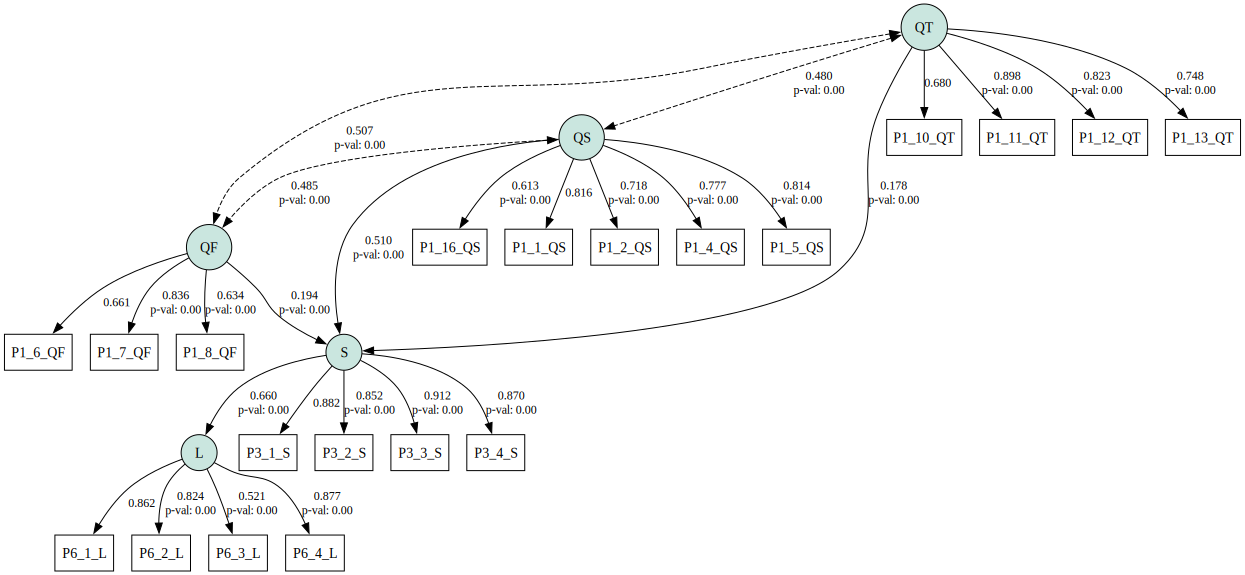

In [6]:
from semopy import semplot
semplot(model, "../practice 2/model.png", std_ests=True, plot_covs=True)

### R squared
Computes $R^2$ for Satisfaction (S) and Loyalty (L) using the standardized betas

$R^2 = 1 - \frac{\sigma^2(residual)}{\sigma^2(total)}$

Hayes, T. (2021). R-squared change in structural equation models with latent variables and missing data. Behavior Research Methods, 53(5), 2127–2157. https://doi.org/10.3758/s13428-020-01532-y


In [7]:
paths = (model.inspect(std_est=True)
             .query("op == '~'")
             .set_index(['lval','rval']))

In [8]:
import numpy as np

def compute_R_squared(
        structural_model: "semopy.Model",
        latent_variable: str
) -> float:
    estimated_matrices = structural_model.inspect(mode='mx')

    beta_matrix = estimated_matrices['Beta']
    residual_variance_matrix = estimated_matrices['Psi']

    latent_variable_names = list(beta_matrix.index)
    if latent_variable not in latent_variable_names:
        raise ValueError(f"The latent variable '{latent_variable}' was not found in the Beta matrix.")

    latent_variable_index = latent_variable_names.index(latent_variable)

    identity_matrix = np.eye(beta_matrix.shape[0])
    inverse_identity_minus_beta = np.linalg.inv(
        identity_matrix - beta_matrix.values
    )

    total_latent_covariance_matrix = (
        inverse_identity_minus_beta
        @ residual_variance_matrix.values
        @ inverse_identity_minus_beta.T
    )

    total_variance = total_latent_covariance_matrix[latent_variable_index, latent_variable_index]

    residual_variance = (
        residual_variance_matrix
        .values[latent_variable_index, latent_variable_index]
    )

    return 1 - (residual_variance / total_variance)

In [9]:
R2_S = compute_R_squared(model, "S")
R2_S

np.float64(0.5479682141350541)

In [10]:
R2_L = compute_R_squared(model, "L")
R2_L

np.float64(0.4358674480103064)

### Direct Effects

In [11]:
raw_item_estimates = (
    model.inspect(std_est=True)
         .query("op == '~' and not lval.str.startswith('P')")
)
direct_effects_df = (
    raw_item_estimates
    .loc[:, ['lval','rval', 'Est. Std', 'Estimate','p-value', 'z-value']]
    .rename(columns={
        'lval': 'Outcome',
        'rval': 'Predictor',
        'Estimate': 'beta',
        'Est. Std': 'beta_std',
    })
    .sort_values(by='beta_std')
)
direct_effects_df['hypothesis_result'] = direct_effects_df.apply(
    lambda row: 'Supported' if row['p-value'] < 0.05 else 'Not Supported',
    axis=1
)

In [12]:
direct_effects_df['p-value'] = (
    direct_effects_df['p-value'].astype(float)
)
direct_effects_df['z-value'] = (
    direct_effects_df['z-value'].astype(float)
)

direct_effects_df = direct_effects_df.round(3)
direct_effects_df

,Outcome,Predictor,beta_std,beta,p-value,z-value,hypothesis_result
2,S,QT,0.178,0.192,0.0,3.748,Supported
1,S,QF,0.194,0.264,0.0,3.788,Supported
0,S,QS,0.510,0.478,0.0,10.199,Supported
3,L,S,0.660,0.623,0.0,14.720,Supported


### Indirect Effects

In [13]:
paths = (
    model.inspect(std_est=True, se_robust=True)
         .query("op == '~'")
         .set_index(['lval', 'rval'])
)

#### Mediator-to-outcome path (M -> Y)

In [14]:
b_path_coefficient = float(
    paths.loc[('L', 'S'), 'Estimate']
)
b_path_standardized_coefficient = float(
    paths.loc[('L', 'S'), 'Est. Std']
)
b_path_standard_error = float(
    paths.loc[('L', 'S'), 'Std. Err']
)

#### Predictor-to-mediator paths (X -> M)

Sobel's z test for mediation is calculated as:

$Z = \frac{a \cdot b}{SE_{ab}}
= \frac{a \cdot b}{\sqrt{b^2 \cdot SE_a^2 + a^2 \cdot SE_b^2}}$

Where:
- a = path coefficient from X -> M
- b = path coefficient from M -> Y
- $SE_a$ = standard error of a
- $SE_b$ = standard error of b

Abu-Bader, S., & Jones, T. V. (2021). Statistical mediation analysis using the Sobel test and Hayes SPSS Process Macro. International Journal of Quantitative and Qualitative Research Methods, 9(1), 42–61.

In [15]:
import math
from scipy.stats import norm

results = []
for predictor in ['QS', 'QF', 'QT']:
    a_path_coefficient = float(
        paths.loc[('S', predictor), 'Estimate']
    )
    a_standardized_path_coefficient = float(
        paths.loc[('S', predictor), 'Est. Std']
    )
    a_path_standard_error = float(
        paths.loc[('S', predictor), 'Std. Err']
    )

    # Indirect effect = a * b
    indirect_effect = a_path_coefficient * b_path_coefficient
    standardized_indirect_effect = (
        a_standardized_path_coefficient * b_path_standardized_coefficient
    )

    # Sobel standard error: sqrt(b^2 * SE_a^2 + a^2 * SE_b^2)
    indirect_se = math.sqrt(
        (b_path_coefficient ** 2) * (a_path_standard_error ** 2) +
        (a_path_coefficient ** 2) * (b_path_standard_error ** 2)
    )

    z_value = indirect_effect / indirect_se
    p_value = 2 * (1 - norm.cdf(abs(z_value)))

    results.append({
        'Path': f'{predictor} -> L (via S)',
        'Indirect Effect': round(indirect_effect, 3),
        'Std. Indirect Effect': round(standardized_indirect_effect, 3),
        'Standard Error':  round(indirect_se, 3),
        'z-value':         round(z_value, 2),
        'p-value':         round(p_value, 4)
    })

In [16]:
indirect_effects_df = pd.DataFrame(results)
indirect_effects_df = indirect_effects_df.round(3)
indirect_effects_df

,Path,Indirect Effect,Std. Indirect Effect,Standard Error,z-value,p-value
0,QS -> L (via S),0.297,0.337,0.042,7.01,0.000
1,QF -> L (via S),0.164,0.128,0.055,2.96,0.003
2,QT -> L (via S),0.119,0.117,0.035,3.42,0.001


# Final Analysis

In [17]:
direct_effects_df

,Outcome,Predictor,beta_std,beta,p-value,z-value,hypothesis_result
2,S,QT,0.178,0.192,0.0,3.748,Supported
1,S,QF,0.194,0.264,0.0,3.788,Supported
0,S,QS,0.510,0.478,0.0,10.199,Supported
3,L,S,0.660,0.623,0.0,14.720,Supported


In [18]:
indirect_effects_df

,Path,Indirect Effect,Std. Indirect Effect,Standard Error,z-value,p-value
0,QS -> L (via S),0.297,0.337,0.042,7.01,0.000
1,QF -> L (via S),0.164,0.128,0.055,2.96,0.003
2,QT -> L (via S),0.119,0.117,0.035,3.42,0.001


In [19]:
print(f"R^2(S) = {R2_S:.3f}")
print(f"R^2(L) = {R2_L:.3f}")

R^2(S) = 0.548
R^2(L) = 0.436


1. H1 - Customer Service Quality (QS) positively influences Satisfaction (S)
   1.  Supported: $\beta^* = 0.510$, $p < 0.001$
2. H2 - Financial Quality (QF) positively influences Satisfaction (S)
   1.  Supported: $\beta^* = 0.194$, $p < 0.001$
3. H3 - Technical quality (QT) positively influences Satisfaction (S)
   1.  Supported: $\beta^* = 0.178$, $p < 0.001$
4. H4 - Satisfaction (S) positively influences Loyalty (L)
   1.  Supported: $\beta^* = 0.660$, $p < 0.001$

Model fit: $\frac{\chi^2}{df}= 3.76$; CFI = .928; GFI = .904; TLI = .916; RMSEA = .075.
All indices meet the conventional good‐fit thresholds (Hu & Bentler, 1999).

Explained variance: $R^2$(S) = .578, $R^2$(L) = .436

Direct effects:
All three quality dimensions (QS, QF, QT) significantly positively influence Satisfaction ($\beta^* = 0.510$, $p < 0.001$; $\beta^* = 0.194$, $p < 0.001$; $\beta^* = 0.178$, $p < 0.001$ respectively), together explaining almost 55% of its variance, thus H1 - H3 are supported.
(QS) is the dominant driver ($\beta^*$ = 0.510), well above the medium effect benchmark of .30 suggested by Cohen (1988).
Satisfaction, in turn, strongly predicts Loyalty (L) ($\beta^*$  = 0.660), accounting for 44 % of loyalty variance

Indirect effects:
QS, QF, and QT all have significant indirect effects on Loyalty through Satisfaction, with the strongest being from QS ($\beta^*$ = 0.337, $p < 0.001$), followed by QF ($\beta^*$ = 0.128, $p < 0.05$) and QT ($\beta^*$ = 0.117, $p < 0.001$).